In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
!unzip "/content/drive/MyDrive/AI and ML/workshop4/Copy of Copy of devnagari digit.zip" -d "/content/drive/MyDrive/AI and ML/workshop4"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/AI and ML/workshop4/DevanagariHandwrittenDigitDataset/Train/digit_7/10299.png  
  inflating: /content/drive/MyDrive/AI and ML/workshop4/DevanagariHandwrittenDigitDataset/Train/digit_7/10300.png  
  inflating: /content/drive/MyDrive/AI and ML/workshop4/DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: /content/drive/MyDrive/AI and ML/workshop4/DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: /content/drive/MyDrive/AI and ML/workshop4/DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: /content/drive/MyDrive/AI and ML/workshop4/DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: /content/drive/MyDrive/AI and ML/workshop4/DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: /content/drive/MyDrive/AI and ML/workshop4/DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: /content

In [2]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


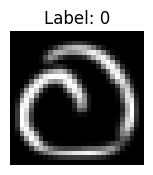

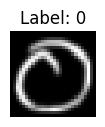

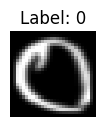

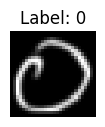

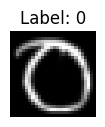

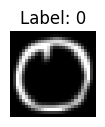

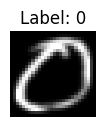

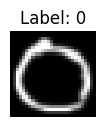

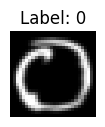

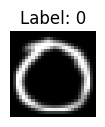

In [36]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow

# Define dataset paths
train_dir = "/content/drive/MyDrive/AI and ML/workshop4/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/AI and ML/workshop4/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder)) # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)} # Map class names to labels
    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            # Load image using PIL
            img = Image.open(img_path).convert("L") # Convert to grayscale
            img = img.resize((img_width, img_height)) # Resize to (28,28)
            img = np.array(img) / 255.0 # Normalize pixel values to [0,1]
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1) # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
    plt.show()

In [37]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
    [
    keras.layers.Input(shape=input_shape),
    keras.layers.Flatten(), # Flatten the 28x28 image to a 784-dimensional vector
    keras.layers.Dense(64, activation="sigmoid"),
    keras.layers.Dense(128, activation="sigmoid"),
    keras.layers.Dense(256, activation="sigmoid"),
    keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
def build_functional_model():
    # Input layer
    inputs = keras.Input(shape=input_shape)
    # Flatten layer
    x = keras.layers.Flatten()(inputs)
    # Hidden layers
    x = keras.layers.Dense(64, activation="sigmoid")(x)
    x = keras.layers.Dense(128, activation="sigmoid")(x)
    x = keras.layers.Dense(256, activation="sigmoid")(x)
    # Output layer
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model
# Build the model
functional_model = build_functional_model()
functional_model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(
  optimizer="sgd", # Stochastic Gradient Descent
  loss="categorical_crossentropy", # Loss function for multi-class classification
  metrics=["accuracy"] # Track accuracy during training
)

In [40]:
batch_size = 128
epochs = 2000
# Callbacks
callbacks = [
  keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
  keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
  x_train,
  y_train,
  batch_size=batch_size,
  epochs=epochs,
  validation_split=0.15,
  callbacks=callbacks,
)

Epoch 1/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1258 - loss: 2.2809 - val_accuracy: 0.0000e+00 - val_loss: 4.0017
Epoch 2/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1189 - loss: 2.1880 - val_accuracy: 0.0000e+00 - val_loss: 4.4107
Epoch 3/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1299 - loss: 2.1818 - val_accuracy: 0.0000e+00 - val_loss: 4.6675
Epoch 4/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1273 - loss: 2.1819 - val_accuracy: 0.0000e+00 - val_loss: 4.8832
Epoch 5/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1346 - loss: 2.1801 - val_accuracy: 0.0000e+00 - val_loss: 5.0295


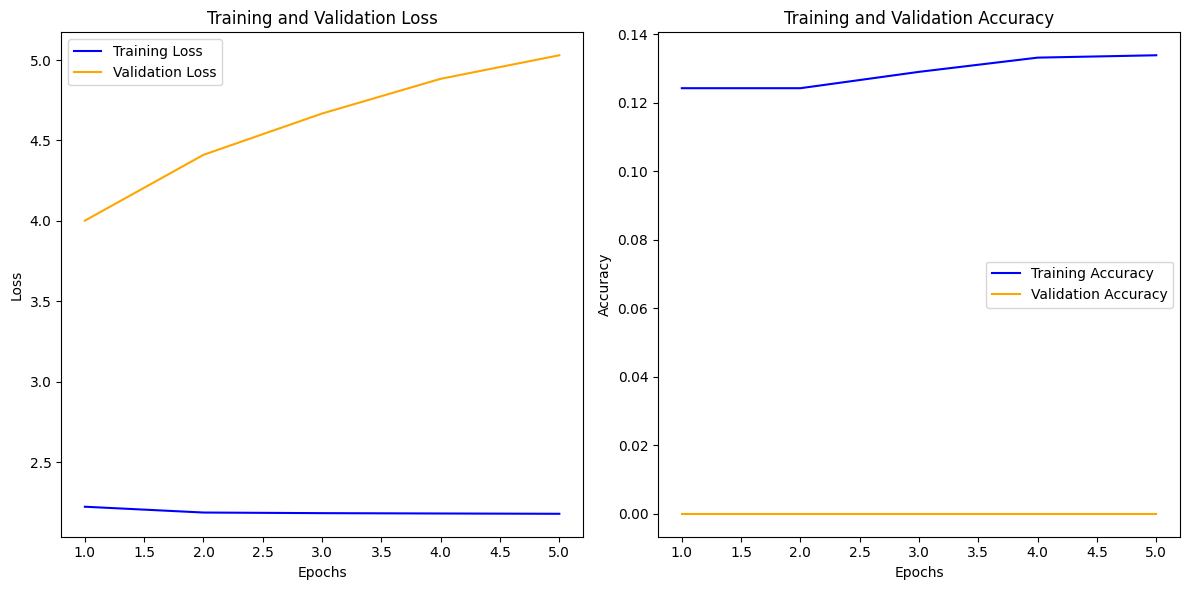

In [41]:
import matplotlib.pyplot as plt
# Assuming ’history’ is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [43]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 3ms/step - accuracy: 0.1227 - loss: 2.6072
Test accuracy: 0.1227


In [44]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted label for first image: 2
True label for first image: 0


In [46]:
model.save('mnist_fully_connected_model.h5')
loaded_model = tf.keras.models.load_model('mnist_fully_connected_model.h5')